In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.patches as patches
import matplotlib.pyplot as plt

In [ ]:
!git clone https://github.com/pratikkayal/PlantDoc-Object-Detection-Dataset.git

Cloning into 'PlantDoc-Object-Detection-Dataset'...
remote: Enumerating objects: 5190, done.
remote: Total 5190 (delta 0), reused 0 (delta 0), pack-reused 5190
Receiving objects: 100% (5190/5190), 941.89 MiB | 47.31 MiB/s, done.
Resolving deltas: 100% (2328/2328), done.
Checking out files: 100% (5199/5199), done.


In [ ]:
df_train = pd.read_csv("/content/PlantDoc-Object-Detection-Dataset/train_labels.csv")
df_train.head(3)

filename  width  height  ... ymin  xmax  ymax
0  cherry-tree-leaves-and-fruits.jpg    350     300  ...   77   299   252
1  cherry-tree-leaves-and-fruits.jpg    350     300  ...  114   148   235
2  cherry-tree-leaves-and-fruits.jpg    350     300  ...  184   189   297

[3 rows x 8 columns]

In [ ]:
df_test = pd.read_csv("/content/PlantDoc-Object-Detection-Dataset/test_labels.csv")
df_test.head(3)

filename  width  ...  xmax ymax
0                     Black%20rot%20on%20foliage.jpg   1060  ...   859  732
1                                    pepper_leaf.jpg    300  ...   251  392
2  depositphotos_1323264-Raspberry-leaf-on-white.jpg   1024  ...   964  710

[3 rows x 8 columns]

In [ ]:
# number of unique images

print(df_train['filename'].nunique())
print(df_test['filename'].nunique())

2345
236


In [ ]:
#number of classes
print(df_train['class'].value_counts())

Blueberry leaf                          827
Tomato leaf yellow virus                787
Peach leaf                              610
Raspberry leaf                          539
Strawberry leaf                         462
Tomato Septoria leaf spot               412
Tomato leaf                             369
Corn leaf blight                        360
Potato leaf early blight                316
Bell_pepper leaf                        312
Tomato mold leaf                        277
Tomato leaf bacterial spot              266
Squash Powdery mildew leaf              251
Bell_pepper leaf spot                   249
Soyabean leaf                           246
Potato leaf late blight                 240
Apple leaf                              237
Tomato leaf mosaic virus                225
Cherry leaf                             221
Tomato leaf late blight                 207
grape leaf                              205
Tomato Early blight leaf                195
Apple rust leaf                 

In [ ]:
df_test['class'].value_counts()

Tomato leaf yellow virus      42
Tomato leaf mosaic virus      36
Strawberry leaf               30
Tomato leaf                   27
Tomato Septoria leaf spot     24
Blueberry leaf                22
Soyabean leaf                 20
Cherry leaf                   19
Tomato Early blight leaf      19
Raspberry leaf                17
Potato leaf early blight      17
Tomato mold leaf              16
grape leaf                    15
Bell_pepper leaf spot         15
Tomato leaf late blight       14
Tomato leaf bacterial spot    14
Apple Scab Leaf               13
Corn leaf blight              12
Apple rust leaf               11
Bell_pepper leaf              11
Peach leaf                    10
Potato leaf late blight       10
Apple leaf                    10
Corn rust leaf                10
grape leaf black rot           8
Squash Powdery mildew leaf     6
Corn Gray leaf spot            4
Name: class, dtype: int64

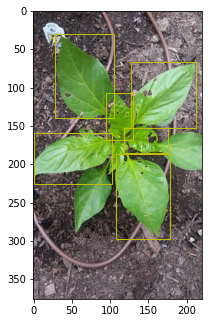

In [ ]:
fig = plt.figure()

#add axes to the image
ax = fig.add_axes([0,0,1,1])

# read and plot the image
image = plt.imread('/content/PlantDoc-Object-Detection-Dataset/TRAIN/0.jpg')
plt.imshow(image)

# iterating over the image for different objects
for _,row in df_train[df_train.filename == "0.jpg"].iterrows():
    xmin = row.xmin
    xmax = row.xmax
    ymin = row.ymin
    ymax = row.ymax
    
    width = xmax - xmin
    height = ymax - ymin
   
        
    # add bounding boxes to the image
    rect = patches.Rectangle((xmin,ymin), width, height, edgecolor = 'y', facecolor = 'none')
    
    ax.add_patch(rect)

In [ ]:
!git clone https://github.com/tensorflow/models.git


Cloning into 'models'...
remote: Enumerating objects: 56609, done.
remote: Counting objects: 100% (860/860), done.
remote: Compressing objects: 100% (397/397), done.
remote: Total 56609 (delta 554), reused 736 (delta 448), pack-reused 55749
Receiving objects: 100% (56609/56609), 572.68 MiB | 36.48 MiB/s, done.
Resolving deltas: 100% (39069/39069), done.


In [ ]:
%cd /content/models/research/
!protoc object_detection/protos/*.proto --python_out=.
# Install TensorFlow Object Detection API.
!cp object_detection/packages/tf2/setup.py .
!python -m pip install .

/content/models/research
Processing /content/models/research
     |████████████████████████████████| 9.6MB 40.0MB/s 
     |████████████████████████████████| 358kB 46.4MB/s 
     |████████████████████████████████| 1.1MB 46.5MB/s 
     |████████████████████████████████| 153kB 56.1MB/s 
     |████████████████████████████████| 61kB 8.5MB/s 
     |████████████████████████████████| 829kB 40.6MB/s 
     |████████████████████████████████| 2.3MB 46.6MB/s 
     |████████████████████████████████| 686kB 45.1MB/s 
     |████████████████████████████████| 51kB 8.3MB/s 
     |████████████████████████████████| 1.2MB 42.8MB/s 
     |████████████████████████████████| 38.2MB 61kB/s 
     |████████████████████████████████| 174kB 59.5MB/s 
     |████████████████████████████████| 645kB 49.8MB/s 
     |████████████████████████████████| 102kB 14.8MB/s 
  Created wheel for object-detection: filename=object_detection-0.1-cp37-none-any.whl size=1648944 sha256=b1808ae23f6ebb2da0413b5f45edd311b60814faf0ac9e68160ed4

In [ ]:
!wget http://download.tensorflow.org/models/object_detection/classification/tf2/20200710/mobilenet_v2.tar.gz

--2021-05-16 03:15:47--  http://download.tensorflow.org/models/object_detection/classification/tf2/20200710/mobilenet_v2.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 172.217.15.80, 2607:f8b0:4004:810::2010
Connecting to download.tensorflow.org (download.tensorflow.org)|172.217.15.80|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8404070 (8.0M) [application/x-tar]
Saving to: ‘mobilenet_v2.tar.gz’

mobilenet_v2.tar.gz 100%[===================>]   8.01M  --.-KB/s    in 0.03s   

2021-05-16 03:15:47 (277 MB/s) - ‘mobilenet_v2.tar.gz’ saved [8404070/8404070]



In [ ]:
!tar -xvf mobilenet_v2.tar.gz

mobilenet_v2/
mobilenet_v2/mobilenet_v2.ckpt-1.index
mobilenet_v2/checkpoint
mobilenet_v2/mobilenet_v2.ckpt-1.data-00001-of-00002
mobilenet_v2/mobilenet_v2.ckpt-1.data-00000-of-00002


In [ ]:
%%bash
PIPELINE_CONFIG_PATH='/content/ssd_mobilenet_v2_320x320_coco17_tpu-8.config'
MODEL_DIR='/content/model/'
NUM_TRAIN_STEPS=1000
SAMPLE_1_OF_N_EVAL_EXAMPLES=1
python /content/models/research/object_detection/model_main_tf2.py \
    --pipeline_config_path=${PIPELINE_CONFIG_PATH} \
    --model_dir=${MODEL_DIR} \
    --num_train_steps=${NUM_TRAIN_STEPS} \
    --alsologtostderr

2021-05-16 03:18:47.481481: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2021-05-16 03:18:49.788544: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-05-16 03:18:49.789416: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-05-16 03:18:49.819138: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-05-16 03:18:49.819770: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB deviceMemoryBandwidth: 298.08GiB/s
2021-05-16 03:18:49.819807: I tensorflow/stream_executor/platform/default/dso_loade

In [ ]:
%%bash
PIPELINE_CONFIG_PATH='/content/ssd_mobilenet_v2_320x320_coco17_tpu-8.config'
MODEL_DIR='/content/model/'
python /content/models/research/object_detection/model_main_tf2.py \
    --pipeline_config_path=${PIPELINE_CONFIG_PATH} \
    --model_dir=${MODEL_DIR} \
    --checkpoint_dir=${MODEL_DIR}  

creating index...
index created!
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=1.49s).
Accumulating evaluation results...
DONE (t=0.48s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.288
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.468
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.329
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.104
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.308
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.406
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.580
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.589
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 

2021-05-16 03:39:34.474459: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
W0516 03:39:37.097670 139959751849856 model_lib_v2.py:1064] Forced number of epochs for all eval validations to be 1.
INFO:tensorflow:Maybe overwriting sample_1_of_n_eval_examples: None
I0516 03:39:37.097865 139959751849856 config_util.py:552] Maybe overwriting sample_1_of_n_eval_examples: None
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I0516 03:39:37.097956 139959751849856 config_util.py:552] Maybe overwriting use_bfloat16: False
INFO:tensorflow:Maybe overwriting eval_num_epochs: 1
I0516 03:39:37.098061 139959751849856 config_util.py:552] Maybe overwriting eval_num_epochs: 1
W0516 03:39:37.098182 139959751849856 model_lib_v2.py:1085] Expected number of evaluation epochs is 1, but instead encountered `eval_on_train_input_config.num_epochs` = 0. Overwriting `num_epochs` to 1.
2021-05-16 03:39:37.104869: I tensorflow/compiler/jit/xla

In [ ]:
!python3 /content/models/research/object_detection/exporter_main_v2.py \
  --pipeline_config_path /content/ssd_mobilenet_v2_320x320_coco17_tpu-8.config \
  --trained_checkpoint_dir /content/model \
  --output_directory /content/exported_model

2021-05-16 04:46:15.750954: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2021-05-16 04:46:17.805949: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-05-16 04:46:17.806736: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-05-16 04:46:17.835301: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-05-16 04:46:17.835892: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB deviceMemoryBandwidth: 298.08GiB/s
2021-05-16 04:46:17.835926: I tensorflow/stream_executor/platform/default/dso_loade